In [1]:
%matplotlib notebook

import numpy as np

import qcodes
from qcodes.data.data_set import DataSet
from qcodes.data.data_array import DataArray
from qcodes.data.io import DiskIO

In [2]:
io = DiskIO(r"C:\Users\a-sochat\development\data\tmp")

# Lets first try to make a 1D dataset, plot it and save to disk

In [3]:
x = np.linspace(-1, 1, 100)
y = np.sin(x)

In [4]:
# We need to encapsulate x in a DataArray as well, otherwise write seems to crash with "np.array not hassible" (bug?)
# We also need to set the array id 
dx = DataArray(name="setpoints_array", unit="I", shape=(100,), array_id="set")
dx.init_data(x)

In [5]:
da = DataArray(name="data_array", set_arrays=(dx,), unit="V", shape=(100,), array_id="data")

In [6]:
da.init_data(y)

In [7]:
ds = DataSet(location="test_1d", io=io, arrays=[da,])

In [8]:
ds

DataSet:
   location = 'test_1d'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Measured | data_array | data_array   | (100,)

<IPython.core.display.Javascript object>


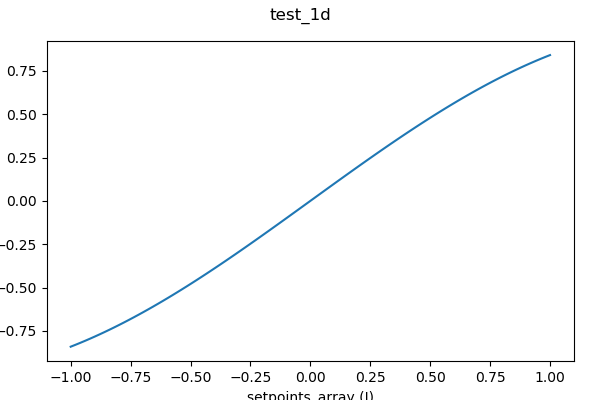

In [9]:
plot = qcodes.MatPlot()
plot.add(ds.data_array)

In [10]:
ds.write()

# 1D works. What about 2D?

In [11]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

xx, yy = np.meshgrid(x, y)
xy = np.vstack([x,y])
zz = np.exp(-(xx**2/0.1**2 + yy**2/0.1**2))

<IPython.core.display.Javascript object>


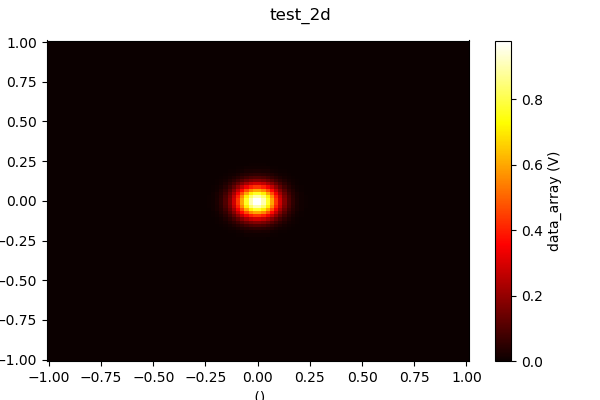

In [12]:
setpoints = DataArray(name="setpoints", unit="I", shape=(2, 100), array_id="set_points")
setpoints.init_data(xy)

da = DataArray(name="data_array", set_arrays=setpoints, unit="V", shape=(100,100), array_id="data")
da.init_data(zz)

ds = DataSet(location="test_2d", io=io, arrays=[da,])

plot = qcodes.MatPlot()
plot.add(ds.data_array)

In [13]:
ds.write()

TypeError: unhashable type: 'numpy.ndarray'

# We see an error which I do not understand. Lets try it a different way

<IPython.core.display.Javascript object>


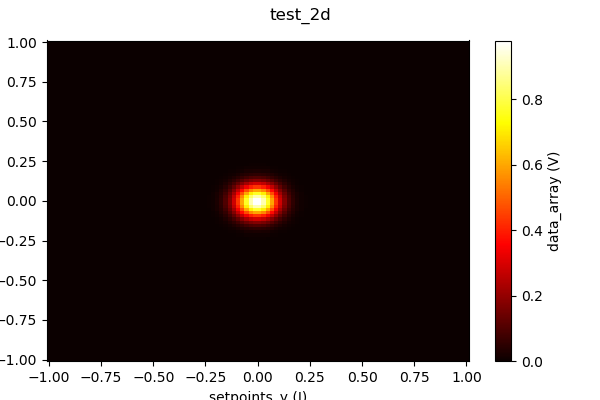

In [14]:
setpoints_x = DataArray(name="setpoints_x", unit="I", shape=(100,), array_id="setpoints_x")
setpoints_x.init_data(x)

setpoints_y = DataArray(name="setpoints_y", unit="I", shape=(100,), array_id="setpoints_y")
setpoints_y.init_data(y)

da = DataArray(name="data_array", set_arrays=(setpoints_x, setpoints_y), unit="V", shape=(100,100), array_id="data")
da.init_data(zz)

ds = DataSet(location="test_2d", io=io, arrays=[da,])

plot = qcodes.MatPlot()
plot.add(ds.data_array)

In [15]:
ds.write()

ValueError: array dimensionality does not match setpoints

# Another error! Can someone help? 